In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def ax_pattern(G, A, D, ax):
    assert set(G.nodes) == set(A).union(set(D))
    pos = nx.kamada_kawai_layout(G)
    #pos = nx.drawing.layout.bipartite_layout(G)
    #pos = nx.drawing.layout.planar_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=A, node_color="green", ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=D, node_color="black", ax=ax)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

def life_step(G, A, D, alive_rule=1, dead_rule=1, rep_rule=1):
    n = len(G.nodes())
    alive = A.copy()
    dead = list(set(range(n)).difference(set(alive)))

    if len(alive) == 0:
        return alive,dead
    else:
        new_alive = []
        new_dead = []

        for node in range(n):
            neighbors_alive = sum([int(node in G[i].keys()) for i in alive])
            neighbors_dead = sum([int(node in G[i].keys()) for i in dead])
            
            if node in alive:
                if (neighbors_alive >= alive_rule) and (neighbors_dead >= dead_rule):
                    new_alive.append(node)
                else:
                    new_dead.append(node)
            elif (neighbors_alive == rep_rule):
                new_alive.append(node)
            else:
                new_dead.append(node)
        
        return new_alive, new_dead

def life_gif(G, A, max_iter=None, filename='life.gif'):
    if max_iter is None:
        max_iter = len(G.nodes())
        
    A = A.copy()
    D = list(set(G.nodes()).difference(set(A)))

    fig, ax = plt.subplots()

    def animate(i, lst, ax):
        G = lst[0]
        A = lst[1]
        D = lst[2]

        if i == 0:
            ax_pattern(G, A, D, ax)
        elif len(A) == 0:
            pass
        else:
            A, D = life_step(G, A, D)

            lst[1] = A
            lst[2] = D
            ax_pattern(G, A, D, ax)

    life_animation = animation.FuncAnimation(fig,
                                             animate,
                                             fargs=([G, A, D], ax),
                                             save_count=max_iter,
                                             interval=1000,
                                             repeat=False)

    
    life_animation.save(filename,
                        writer='imagemagick',
                        fps=1,
                        dpi=300)

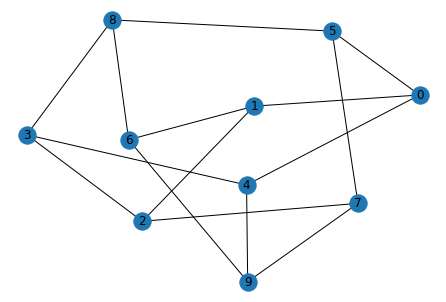

In [3]:
G = nx.generators.small.petersen_graph()
nx.draw(G, with_labels=True)

In [6]:
life_gif(G, [4], max_iter=10)

NameError: name 'cascade_gif' is not defined